<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/1_Using_Kfold_cross_validation_and_Grid_search_parameter_optimization_for_Keras_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.layers import Dense,Conv2D, BatchNormalization,MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
import numpy
# fix random seed for reproducibility
seed = 7
import pandas as pd
numpy.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=("https://raw.githubusercontent.com/rohailkhan/data/main/diabetes.csv")
diabetics=pd.read_csv(data ,error_bad_lines=False) 

In [3]:
diabetics.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
x=np.array([[0, 1, 2],
       [3,4, 5],
       [6, 7, 8]])
np.ones_like(x)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [25]:
np.triu(x)

array([[0, 1, 2],
       [0, 4, 5],
       [0, 0, 8]])

In [21]:
y=np.array([0., 1., 2.])
np.ones_like(y) 

array([1., 1., 1.])

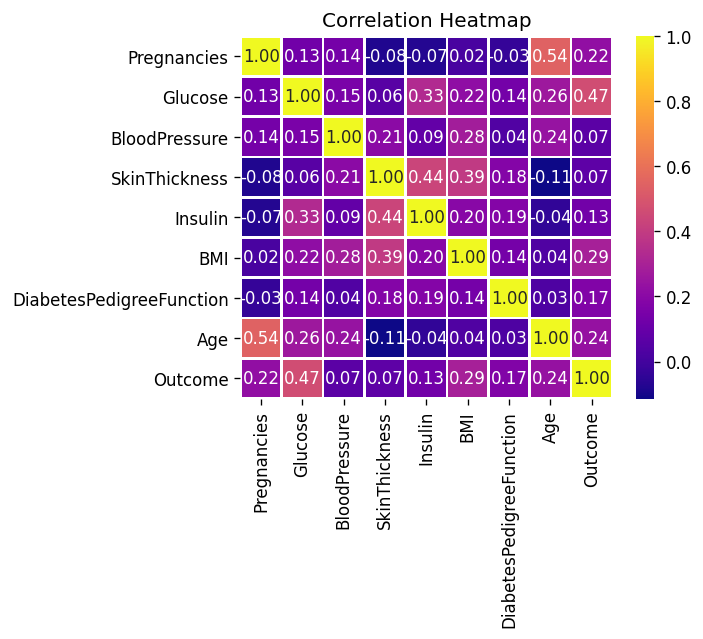

In [14]:
plt.figure(dpi = 120,figsize= (5,4))
# mask = np.triu(np.ones_like(diabetics.corr(),dtype = bool))
sns.heatmap(diabetics.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

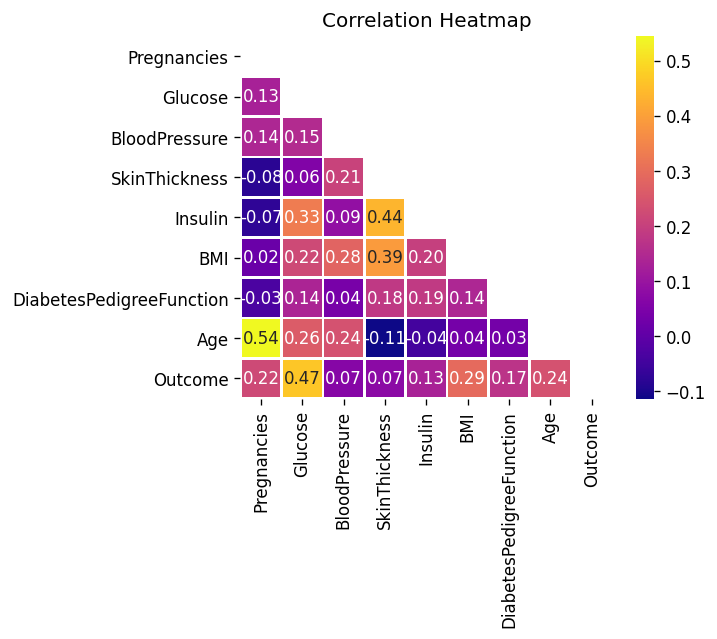

In [30]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(diabetics.corr()))
sns.heatmap(diabetics.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X=diabetics.iloc[:,0:8]
y=diabetics.iloc[:,8:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(Dense(12,input_shape=(8,),activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
#compilation
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
# Fit the model
model.fit(X, y, validation_split=0.33, epochs=120, batch_size=10)

Epoch 1/120
52/52 [==============================] - 1s 5ms/step - loss: 10.4706 - accuracy: 0.6401 - val_loss: 5.0269 - val_accuracy: 0.6732
Epoch 2/120
52/52 [==============================] - 0s 2ms/step - loss: 2.7094 - accuracy: 0.5837 - val_loss: 1.4445 - val_accuracy: 0.5354
Epoch 3/120
52/52 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.5759 - val_loss: 0.9292 - val_accuracy: 0.5197
Epoch 4/120
52/52 [==============================] - 0s 2ms/step - loss: 0.8121 - accuracy: 0.5350 - val_loss: 0.8202 - val_accuracy: 0.5354
Epoch 5/120
52/52 [==============================] - 0s 2ms/step - loss: 0.7780 - accuracy: 0.5681 - val_loss: 0.7855 - val_accuracy: 0.5276
Epoch 6/120
52/52 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.5681 - val_loss: 0.7799 - val_accuracy: 0.5472
Epoch 7/120
52/52 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.6284 - val_loss: 0.7569 - val_accuracy: 0.5709
Epoch 8/120


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
scoress=model.evaluate(X,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7500


In [ ]:
scoress[0], scoress[1]

(0.4983251392841339, 0.75)

## Using Kfold split for data

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# # our previous model
# model=Sequential()
# model.add(Dense(12,input_shape=(8,),activation='relu'))
# model.add(Dense(24,activation='relu'))
# model.add(Flatten())
# model.add(Dense(1,activation='sigmoid'))
# #compilation
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
# make a kfold split object
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [ ]:
for train,test in kfold.split(X,y):
  print(len(train),len(test))

691 77
691 77
691 77
691 77
691 77
691 77
691 77
691 77
692 76
692 76


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
scoress[0], scoress[1]

(0.4983251392841339, 0.75)

In [ ]:
# split into input (X) and output (Y) variables
X=diabetics.iloc[:,0:8]
y=diabetics.iloc[:,8:]

In [ ]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [ ]:
cvscores = []
for train,test in kfold.split(X,y):
  model1=Sequential()
  model1.add(Dense(12,input_shape=(8,),activation='relu'))
  model1.add(Dense(24,activation='relu'))
  model1.add(Flatten())
  model1.add(Dense(1,activation='sigmoid'))
  #compilation
  model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
  # Fit the model1 on Training data
  model1.fit(X[train], y[train], validation_split=0.33, epochs=120, batch_size=10)
  # evaluate the model1 on test data
  scores2 = model1.evaluate(X[test], y[test], verbose=0)
  print("%s : %.2f%%" % (model1.metrics_names[1], scores2[1]*100))
  cvscores.append(scores2[1]*100)

In [ ]:
cvscores

[53.24675440788269,
 75.32467246055603,
 67.53246784210205,
 74.02597665786743,
 71.42857313156128,
 62.337660789489746,
 72.72727489471436,
 72.72727489471436,
 77.63158082962036,
 77.63158082962036]

# Optimize Deep Learning Model Parameters using **KerasClassifier** wrapper and **GridsearchCV**

We will grid search of the following parameters to find the best values (for the estimator i.e our model)

1.   optimizers ['rmsprop', 'adam']
2.   initializer ['glorot_uniform', 'normal', 'uniform']
3.   no of epochs numpy.array([50, 100, 150])
4.   batches numpy.array([5, 10, 20])

In [ ]:
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


In [ ]:
data=("https://raw.githubusercontent.com/rohailkhan/data/main/diabetes.csv")
diabetics=pd.read_csv(data ,error_bad_lines=False) 

In [ ]:
#model function without training
def mymodel(optimizer='adam', kernel_initializer='glorot_uniform'):
  model1=Sequential()
  model1.add(Dense(12,input_shape=(8,),activation='relu',kernel_initializer='glorot_uniform'))
  model1.add(Dense(24,activation='relu'))
  model1.add(Flatten())
  model1.add(Dense(1,activation='sigmoid'))
  #compilation
  model1.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
  #classifier.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
  return model1
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
X=np.array(diabetics.iloc[:,0:8])
y=np.array(diabetics.iloc[:,8])

In [ ]:
# create model
model = KerasClassifier(build_fn=mymodel, verbose=0)

## grid search epochs, batch size and optimizer

In [ ]:
optimizers = ['rmsprop', 'adam']
kernel_initializer = ['glorot_uniform', 'normal', ]
epochs = numpy.array([50, 100])
batches = numpy.array([5, 10])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, kernel_initializer=kernel_initializer)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y)

# **The Selected Final model after grid search**

In [ ]:
final_model=grid_result.best_estimator_

## Best Parameter set & Best score from the grid search after Training

In [ ]:
results=pd.DataFrame(grid_result.cv_results_)

In [ ]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_batch_size', 'param_kernel_initializer', 'param_nb_epoch',
       'param_optimizer', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_kernel_initializer,param_nb_epoch,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.091995,4.306437,0.212091,0.009984,5,glorot_uniform,50,rmsprop,"{'batch_size': 5, 'kernel_initializer': 'gloro...",0.662338,0.623377,0.532468,0.542484,0.607843,0.593702,0.049324,8
1,0.878450,0.159603,0.209113,0.002046,5,glorot_uniform,50,adam,"{'batch_size': 5, 'kernel_initializer': 'gloro...",0.558442,0.532468,0.519481,0.686275,0.588235,0.576980,0.059503,12
2,0.971645,0.181103,0.255883,0.107167,5,glorot_uniform,100,rmsprop,"{'batch_size': 5, 'kernel_initializer': 'gloro...",0.642857,0.616883,0.577922,0.509804,0.594771,0.588448,0.044955,9
3,0.993382,0.210157,0.208048,0.015812,5,glorot_uniform,100,adam,"{'batch_size': 5, 'kernel_initializer': 'gloro...",0.668831,0.642857,0.655844,0.705882,0.601307,0.654944,0.034092,1
4,1.085150,0.247837,0.213419,0.008408,5,normal,50,rmsprop,"{'batch_size': 5, 'kernel_initializer': 'norma...",0.629870,0.590909,0.558442,0.601307,0.535948,0.583295,0.032897,11


## Getting best model parameters from the dataframe of results

In [ ]:
results.sort_values(by='mean_test_score',ascending=False).iloc[0:1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_kernel_initializer,param_nb_epoch,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.993382,0.210157,0.208048,0.015812,5,glorot_uniform,100,adam,"{'batch_size': 5, 'kernel_initializer': 'gloro...",0.668831,0.642857,0.655844,0.705882,0.601307,0.654944,0.034092,1


## Getting best model parameters using .best_params_
### Note: .best_params gives you the mean-test-score

In [ ]:
grid_result.best_params_  , grid_result.best_score_

({'batch_size': 5,
  'kernel_initializer': 'glorot_uniform',
  'nb_epoch': 100,
  'optimizer': 'adam'},
 0.6549444079399109)